In [ ]:
def square(x):
    return x*x

class Student:
    age = 10
    name = "Tolu"
    grade = "B"

    def greet(self):
        # print("My grade is {}".format(self.grade))
        print(f"My name is {self.name}; I am {self.age} years old")

    def get_age_name(self):
        return self.name, self.age

student1 = Student()
student1.greet()
# student = Student()
name, age, year = student1.get_age_name()
print(name)

My name is Tolu; I am 10 years old


ValueError: not enough values to unpack (expected 3, got 2)

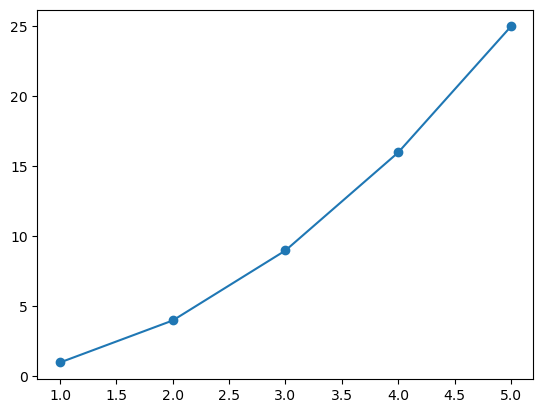

In [33]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [item*item for item in x]
plt.plot(x, y, '-o')

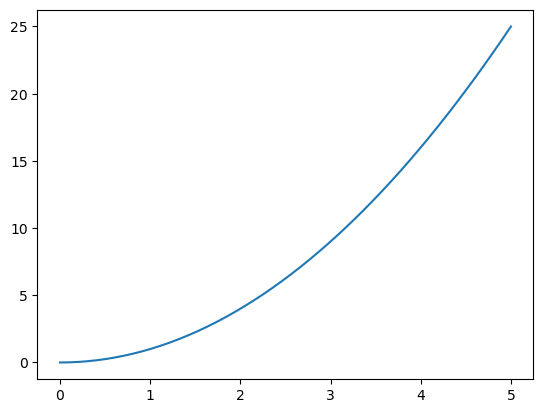

In [ ]:
import numpy as np
x_values = np.linspace(0, 5, 50)
y_values = x_values * x_values
plt.plot(x_values, y_values)

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/naijacoderorg/lectures/main/lectures2024/datascience/migrations.csv'
df = pd.read_csv(url)


In [50]:
df2 = pd.read_csv('migrations.csv')
# df2.head(10)
by_continent = df2.groupby('origin_continent')


- read dataframe from 'https://raw.githubusercontent.com/naijacoderorg/lectures/main/lectures2024/datascience/migrations.csv'

- Find the total migration from Nigeria to Ethiopia in 1970.

- Find the total migration from Ghana to all countries in 1980.


In [62]:
df.head(10)

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
0,Afghanistan,AFG,Asia,Afghanistan,AFG,Asia,0,0,0,0,0
1,Afghanistan,AFG,Asia,Albania,ALB,Europe,0,0,0,0,0
2,Afghanistan,AFG,Asia,Algeria,DZA,Africa,41,16,13,10,8
3,Afghanistan,AFG,Asia,American Samoa,ASM,Oceania,0,0,0,0,0
4,Afghanistan,AFG,Asia,Andorra,AND,Europe,0,0,2,5,6
5,Afghanistan,AFG,Asia,Angola,AGO,Africa,0,0,0,0,0
6,Afghanistan,AFG,Asia,Anguilla,AIA,North America,0,0,0,0,0
7,Afghanistan,AFG,Asia,Antigua and Barbuda,ATG,North America,0,0,0,0,0
8,Afghanistan,AFG,Asia,Argentina,ARG,South America,6,9,13,21,0
9,Afghanistan,AFG,Asia,Armenia,ARM,Asia,0,0,0,0,7


In [75]:
# Find the total migration from Ghana to all countries in 1980.

ghana_migrations = df[df["origin_country"] == "Ghana"]
# ghana_migrations
ghana_migrations['1980'].sum()

np.int64(380565)

In [82]:
# - Find the total migration from Nigeria to Ethiopia in 1970.
nigeria_migrations = df["origin_country"] == "Nigeria"
to_ethiopia = df["dest_country"] == "Ethiopia"
nigeria_to_ethiopia = df[nigeria_migrations & to_ethiopia]
nigeria_to_ethiopia['1970'].sum()


np.int64(6710)

In [ ]:
df[(df["dest_continent"] == 'Asia') & (df["dest_continent"] == "Europe")]

,origin_country,origin_country_code,origin_continent,dest_country,dest_country_code,dest_continent,1960,1970,1980,1990,2000
0,Afghanistan,AFG,Asia,Afghanistan,AFG,Asia,0,0,0,0,0
1,Afghanistan,AFG,Asia,Albania,ALB,Europe,0,0,0,0,0
4,Afghanistan,AFG,Asia,Andorra,AND,Europe,0,0,2,5,6
9,Afghanistan,AFG,Asia,Armenia,ARM,Asia,0,0,0,0,7
12,Afghanistan,AFG,Asia,Austria,AUT,Europe,47,148,217,267,2488
...,...,...,...,...,...,...,...,...,...,...,...
51062,Zimbabwe,ZWE,Africa,United Kingdom,GBR,Europe,176,8009,16717,22660,49791
51065,Zimbabwe,ZWE,Africa,Uzbekistan,UZB,Asia,0,0,0,0,0
51068,Zimbabwe,ZWE,Africa,Vietnam,VNM,Asia,0,0,0,0,2
51072,Zimbabwe,ZWE,Africa,West Bank and Gaza,PSE,Asia,0,0,0,0,0


In [ ]:
from_nigeria_indices = df['origin_country'] == 'Nigeria'
to_ethiopia_indices = df['dest_country'] == 'Ethiopia'

nigeria_to_ethiopia = df[from_nigeria_indices & to_ethiopia_indices]
a = nigeria_to_ethiopia['1970']
print(nigeria_to_ethiopia['1970'])

33284    6710
Name: 1970, dtype: int64


NoneType

### Q3: What are the **top 5** countries that Nigerians migrated to in 2000?

Game plan:
- Filter for rows with origin country equal to Nigeria
- Group by origin country and destination country
- Select the '2000' column before aggregating
- Aggregate using a sum function
- Reset index. This step is necessary to add our grouping variables back into the dataset as columns instead of as indices.
- Sort values in descending order

In [85]:
NGA_continent_emigrations = (df[df['origin_country'] == 'Nigeria']
                             .groupby(['origin_country','dest_country'])
                             ['2000']
                             .sum()
                             .reset_index()
                             .sort_values(by='2000', ascending=False)
                             .head(5)
                            )
NGA_continent_emigrations

,origin_country,dest_country,2000
213,Nigeria,United States,141571
212,Nigeria,United Kingdom,106221
33,Nigeria,Cameroon,72187
47,Nigeria,Cote d'Ivoire,40975
96,Nigeria,Italy,26868


<BarContainer object of 5 artists>

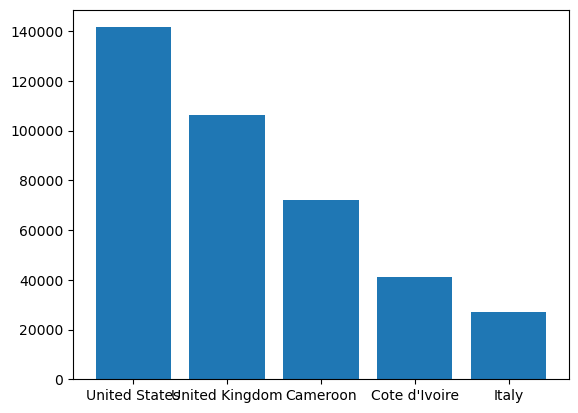

In [86]:
dest_countries = NGA_continent_emigrations['dest_country']
total_migrations = NGA_continent_emigrations['2000']
plt.bar(dest_countries, total_migrations) # first arg is for x-axis, second arg is for y-axis, we can optionally specify a color for the bars
